# <center> Unsupervised learning: Clusterings </center>

## 1. Partitioning clustering: `k-means`
Đây là thuật toán đơn giản, chia dữ liệu thành các cụm khác nhau, chia theo số lượng nhóm. CÁc nhóm này phải được định nghĩa trước. 
Được sử dụng nhiều trong ứng dụng tìm kiếm: google, phân loại khách hàng
cơ chế: khởi tạo k điểm dữ liệu. K điểm đó được gọi là điểm trung tâm (claster center, centrods). CÁc điểm dữ liệu còn lại, tính toán khoảng cách đến diểm centrods, khoảng cách ngắn nhất thì được coi là thuộc nhóm với centrods. Sau đó, tính giá trị trung bình của các điểm trong nhóm đó, để ra một centrods mới. sau đó, lại tính toán khoảng cách cho đến khi khoảng cách này không thay đổi. 



![](https://miro.medium.com/max/1280/1*5UHmgCaTD8EegsPuKcxC1Q.png)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
iris=sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

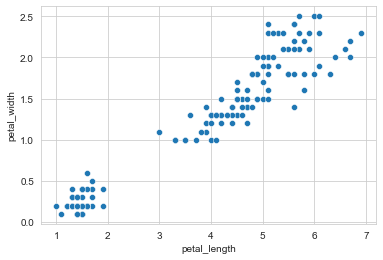

In [6]:
sns.set_style('whitegrid')
sns.scatterplot(data=iris,
               x='petal_length',
               y='petal_width',
               # hue='species'
               )


In [8]:
from sklearn.cluster import KMeans

In [19]:
X, y = iris[['petal_width','petal_length']],iris['species']
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [26]:
ypred = kmeans.predict(X)

In [27]:
value_map = {0: 'setosa' , 1:'versicolor' , 2: 'virginica'}
ypred = np.array([value_map[i] for i in ypred])
ypred

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa'

<function matplotlib.pyplot.show(close=None, block=None)>

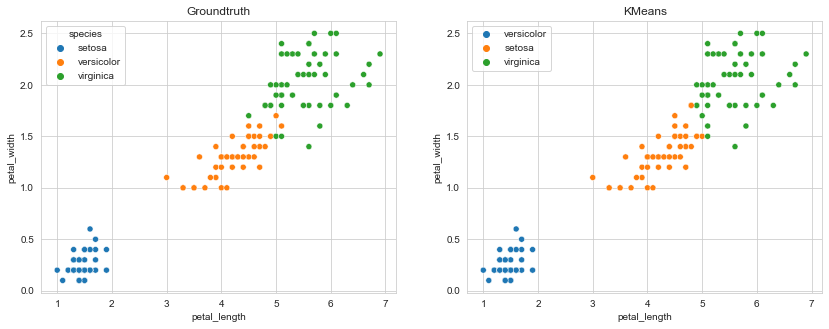

In [48]:
fig, axs = plt.subplots(1,2, figsize=(14,5))

ax = sns.scatterplot(data=X, x='petal_length', y='petal_width', hue=y, ax=axs[0])
ax.set_title('Groundtruth')
ax1 = sns.scatterplot(data=X, x='petal_length', y='petal_width', hue=ypred, ax=axs[1])
ax1.set_title('KMeans')
plt.show

In [29]:
kmeans.inertia_ #sum of distance

31.371358974358984

In [34]:
sse = []
for i in range(1,10): # from 1 to 10 cluster, which number of clusters is optimal?
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append((i, km.inertia_))

In [37]:
sse = np.array(sse)
sse


array([[  1.        , 550.89533333],
       [  2.        ,  86.39021985],
       [  3.        ,  31.37135897],
       [  4.        ,  19.47712336],
       [  5.        ,  13.91690876],
       [  6.        ,  11.08457522],
       [  7.        ,   9.35439076],
       [  8.        ,   7.66701952],
       [  9.        ,   6.70180532]])

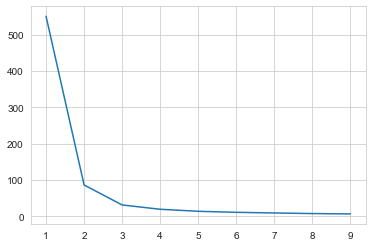

In [38]:
fig = plt.figure()
plt.plot(sse[:,0], sse[:,1])
plt.show()

## 2. Hierachical clustering: `agglomerative clustering` 
![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-28-at-11.48.48-am.png)
![](https://miro.medium.com/max/1039/0*afzanWwrDq9vd2g-)

In [42]:
from sklearn.cluster import AgglomerativeClustering
agglo=AgglomerativeClustering(n_clusters=3)
y_pred1=agglo.fit_predict(X)

In [40]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
y_pred1=np.np.array([value_map[i] for i in y_pred1])
y_pred1

<function matplotlib.pyplot.show(close=None, block=None)>

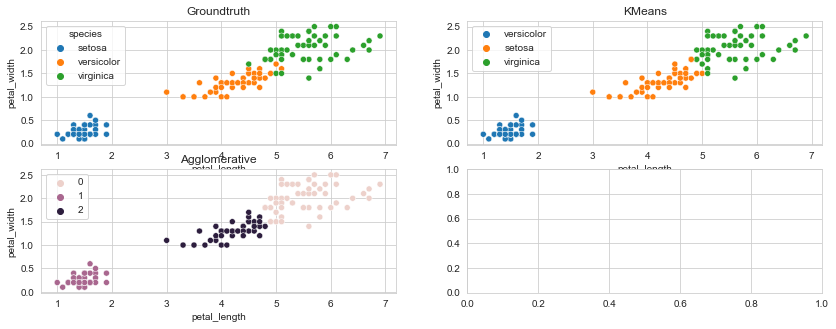

In [47]:
fig, axs = plt.subplots(2,2, figsize=(14,5))

ax = sns.scatterplot(data=X, x='petal_length', y='petal_width', hue=y, ax=axs[0,0])
ax.set_title('Groundtruth')
ax1 = sns.scatterplot(data=X, x='petal_length', y='petal_width', hue=ypred, ax=axs[0,1])
ax1.set_title('KMeans')
ax2 = sns.scatterplot(data=X, x='petal_length', y='petal_width', hue=y_pred1, ax=axs[1,0]) # hàng 1, cột số 0
ax2.set_title('Agglomerative')
plt.show

## 3. Density-based clustering: `DBSCAN`
DBDscan cần phải định nghĩa tham số:
- radius(Eps): Bán kính, căn cứ vào bán kính để lựa chọn
- density(T): số lượng điểm dữ liệu trong bán kính đó. 


![](https://user-images.githubusercontent.com/7659/74451662-d2325000-4e34-11ea-9770-a57e81259eb9.png)
![](https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

1. Đinh nghĩa điểm dữ liệu: (pi, eps)
- core point: Là điểm có chứa ít nhất pi điểm dữ liệu trong bán kính `eps`
- border point: tồn tại ít nhát 1 điêm core point trong bán kính của nó.
- noise point: không phải các điểm ở trên
Thuật toán này không nhạy cảm với dữ liệu nhiễu
2. TẠo ra các grap, dựa vào điểm core point nếu bán kính `eps` bị overlap
3. 
4. trả về điểm dữ liệu 

In [52]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) #pi, eps
y_pred2 = dbscan.fit_predict(X)

In [53]:
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

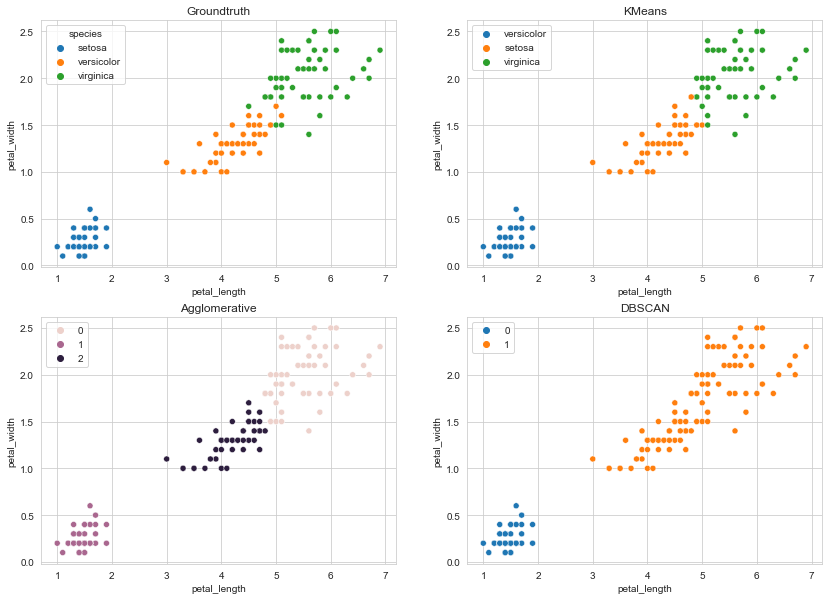

In [54]:
fig, axs= plt.subplots(2, 2, figsize=(14,10))
ax = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y,
                ax=axs[0,0]
               )
ax.set_title('Groundtruth')

ax1 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=ypred,
                ax=axs[0,1]
               )
ax1.set_title('KMeans')

ax2 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred1,
                ax=axs[1,0]
               )
ax2.set_title('Agglomerative')


ax3 = sns.scatterplot(data=X,
                x='petal_length',
                y='petal_width',
                hue=y_pred2,
                ax=axs[1,1]
               )
ax3.set_title('DBSCAN')

plt.show()


In [ ]:
_